<a href="https://colab.research.google.com/github/Dipcha1/Operation_Research_Lab/blob/main/Project_Assignments/RegressionAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Assignment

I want you to practice some regression and analyzing your results.  Utilize this document to load data directly.

In [62]:
import pandas as pa
import numpy as np
import matplotlib.pyplot as plt

## Linear Regression

Fit goals vs points in a linear regression.  Fit a multiple regression on goals and assists vs points.  What do you notice about these two fits.
https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv

In [63]:
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv')

In [64]:
x = np.array(df[['G','A']])
y = np.array(df.PTS)

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


df = pd.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/hockey.csv')


x = np.array(df[['G','A']])
y = np.array(df.PTS)

print("Data shape check:")
print(f"x shape: {x.shape}")
print(f"y shape: {y.shape}")
print("\nFirst 5 rows of x (Goals, Assists):")
print(x[:5])
print("\nFirst 5 values of y (Points):")
print(y[:5])

Data shape check:
x shape: (1076, 2)
y shape: (1076,)

First 5 rows of x (Goals, Assists):
[[ 6 13]
 [12 13]
 [11  8]
 [ 1  5]
 [ 0  0]]

First 5 values of y (Points):
[19 25 19  6  0]


In [66]:
model1 = LinearRegression()
model1.fit(x[:,0].reshape(-1,1), y)
r1 = model1.score(x[:,0].reshape(-1,1), y)

print(" Simple regression ")
print(f"Using only Goals to predict Points")
print(f"R^2 score: {r1:.4f}")

 Simple regression 
Using only Goals to predict Points
R^2 score: 0.8462


In [67]:
model2 = LinearRegression()
model2.fit(x, y)
r2 = model2.score(x, y)

print(" Multiple regression ")
print(f"Using Goals + Assists to predict Points")
print(f"R^2 score: {r2:.4f}")

 Multiple regression 
Using Goals + Assists to predict Points
R^2 score: 1.0000


In [68]:
print("=== REGRESSION COMPARISON ===")
print(f"Simple (Goals only):    R^2 = {r1:.4f}")
print(f"Multiple (Goals + Assists): R^2 = {r2:.4f}")
print(f"Improvement: {r2 - r1:.4f}")
print("\n The multiple regression is perfect because in hockey:")
print("   Points = Goals + Assists ")

print(f"\nChecking if Points = Goals + Assists exactly:")
print(f"Sum of Goals + Assists equals Points for all records: {(df['G'] + df['A'] == df['PTS']).all()}")


print("\nExamples from the data:")
print(df[['G', 'A', 'PTS']].head(10))

=== REGRESSION COMPARISON ===
Simple (Goals only):    R^2 = 0.8462
Multiple (Goals + Assists): R^2 = 1.0000
Improvement: 0.1538

 The multiple regression is perfect because in hockey:
   Points = Goals + Assists 

Checking if Points = Goals + Assists exactly:
Sum of Goals + Assists equals Points for all records: True

Examples from the data:
    G   A  PTS
0   6  13   19
1  12  13   25
2  11   8   19
3   1   5    6
4   0   0    0
5   6   8   14
6   6  18   24
7   2   9   11
8   4   9   13
9   1   1    2


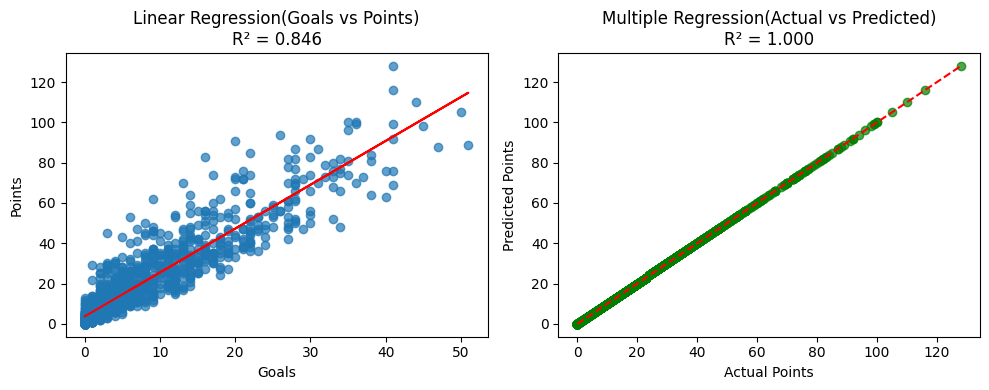

In [69]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.scatter(x[:,0], y, alpha=0.7)
plt.plot(x[:,0], model1.predict(x[:,0].reshape(-1,1)), 'r-')
plt.xlabel('Goals'); plt.ylabel('Points')
plt.title(f'Linear Regression(Goals vs Points)\nR² = {r1:.3f}')

plt.subplot(1,2,2)
pred = model2.predict(x)
plt.scatter(y, pred, alpha=0.7, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Points'); plt.ylabel('Predicted Points')
plt.title(f'Multiple Regression(Actual vs Predicted)\nR² = {r2:.3f}')

plt.tight_layout()
plt.show()



## Logistic Regression

Using the 538 Avengers dataset,https://github.com/fivethirtyeight/data/blob/master/avengers/avengers.csv, fit a logistic regression to predict `Death1` (first time a character might die) based on whatever variables you find interesting.  Make a prediction using probabilities on your favorite character.

In [70]:
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/Avengers')
df.head()

,URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,...,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
0,http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NaN,Sep-63,1963,52,Full,...,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Merged with Ultron in Rage of Ultron Vol. 1. A...
1,http://marvel.wikia.com/Janet_van_Dyne_(Earth-...,Janet van Dyne,1165,YES,FEMALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Secret Invasion V1:I8. Actually was se...
2,http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Death: ""Later while under the influence of Imm..."
3,http://marvel.wikia.com/Robert_Bruce_Banner_(E...,Robert Bruce Banner,2089,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Dies in Ghosts of the Future arc. However ""he ..."
4,http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NaN,Sep-63,1963,52,Full,...,YES,YES,NO,NaN,NaN,NaN,NaN,NaN,NaN,Dies in Fear Itself brought back because that'...


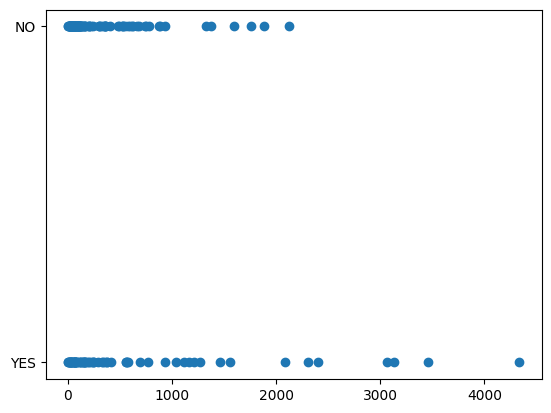

In [71]:
import pandas as pa
df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/Avengers')
df.head()

plt.scatter(df['Appearances'],df['Death1'])

In [72]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module='sklearn.utils.validation')

df_avengers = pd.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/Avengers')

df_avengers_clean = df_avengers[['Name/Alias', 'Death1', 'Appearances', 'Gender']].dropna()

df_avengers_clean['Death1_binary'] = df_avengers_clean['Death1'].map({'YES': 1, 'NO': 0})

df_avengers_clean = pd.get_dummies(df_avengers_clean, columns=['Gender'], drop_first=True)

X = df_avengers_clean[['Appearances', 'Gender_MALE']]
y = df_avengers_clean['Death1_binary']

model = LogisticRegression()
model.fit(X, y)

print("Logistic Regression model fitted.")
print(f"Coefficients: {model.coef_[0]}")
print(f"Intercept: {model.intercept_[0]}")

iron_man_data = df_avengers_clean[df_avengers_clean['Name/Alias'].str.contains('Tony Stark|Iron Man', na=False)]

if not iron_man_data.empty:
    appearances_iron_man = iron_man_data['Appearances'].iloc[0]
    gender_iron_man = iron_man_data['Gender_MALE'].iloc[0]

    iron_man_features = np.array([[appearances_iron_man, gender_iron_man]])
    death_prob_iron_man = model.predict_proba(iron_man_features)[0][1]

    print(f"\nPredicted probability of Death1 for Iron Man ({iron_man_data['Name/Alias'].iloc[0]}): {death_prob_iron_man:.3f}")
else:
    print("\nIron Man not found in the dataset.")

hypothetical_features = np.array([[100, 0]])
death_prob_hypothetical = model.predict_proba(hypothetical_features)[0][1]
print(f"Predicted probability of Death1 for a hypothetical character (100 appearances, Female): {death_prob_hypothetical:.3f}")

Logistic Regression model fitted.
Coefficients: [0.00074897 0.12834124]
Intercept: -0.8771534548112885

Iron Man not found in the dataset.
Predicted probability of Death1 for a hypothetical character (100 appearances, Female): 0.310


## Find Your Own Regression

I have compiled olympic 100m dash records from a wikipedia page https://en.wikipedia.org/wiki/100_metres_at_the_Olympics.  Use this data and fit a regression of some type for prediciting `Time`.  Justify your model used in words and pictures. Predict the new Olympic Record for 2024 and 2300.  Describe in words the validity of your predictions.

In [73]:



df = pa.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv')
x = np.array(df)

df.head()

,Time,Athlete,Nation,Games,Round,Date,Gender
0,12.2,Francis Lane,United States (USA),1896,Heat 1,1896-04-06,Men
1,12.2,Thomas Curtis,United States (USA),1896,Heat 2,1896-04-06,Men
2,11.8,Tom Burke,United States (USA),1896,Heat 3,1896-04-06,Men
3,11.4,Arthur Duffey,United States (USA),1900,Heat 1,6/14/1900,Men
4,11.4,Walter Tewksbury,United States (USA),1900,Heat 2,6/14/1900,Men


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('https://raw.githubusercontent.com/nurfnick/Data_Sets_For_Stats/master/CuratedDataSets/100mOlympicRecords.csv')
print("Data loaded! Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print(f"\nTime range: {df['Time'].min()} - {df['Time'].max()} seconds")

Data loaded! Shape: (76, 7)

First 5 rows:
   Time           Athlete               Nation  Games   Round        Date  \
0  12.2      Francis Lane  United States (USA)   1896  Heat 1  1896-04-06   
1  12.2     Thomas Curtis  United States (USA)   1896  Heat 2  1896-04-06   
2  11.8         Tom Burke  United States (USA)   1896  Heat 3  1896-04-06   
3  11.4     Arthur Duffey  United States (USA)   1900  Heat 1   6/14/1900   
4  11.4  Walter Tewksbury  United States (USA)   1900  Heat 2   6/14/1900   

  Gender  
0    Men  
1    Men  
2    Men  
3    Men  
4    Men  

Time range: 9.63 - 13.0 seconds


In [75]:
# Extract year from Date column
df['Year'] = pd.to_datetime(df['Date'], format='mixed').dt.year
X = df['Year'].values.reshape(-1, 1)
y = df['Time'].values

print(f"Years: {df['Year'].min()} - {df['Year'].max()}")
print(f"Times: {y.min():.1f} - {y.max():.1f} seconds")

Years: 1896 - 2021
Times: 9.6 - 13.0 seconds


In [76]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

print("Linear Regression Model:")
print(f"Time = {model.intercept_:.3f} + {model.coef_[0]:.5f} × Year")
print(f"R² score: {model.score(X, y):.3f}")

Linear Regression Model:
Time = 35.583 + -0.01258 × Year
R² score: 0.186


In [77]:
future_years = [[2024], [2300]]
predictions = model.predict(future_years)

print("MY PREDICTIONS:")
print(f"2024 Olympic Record: {predictions[0]:.2f} seconds")
print(f"2300 Olympic Record: {predictions[1]:.2f} seconds")

MY PREDICTIONS:
2024 Olympic Record: 10.13 seconds
2300 Olympic Record: 6.65 seconds


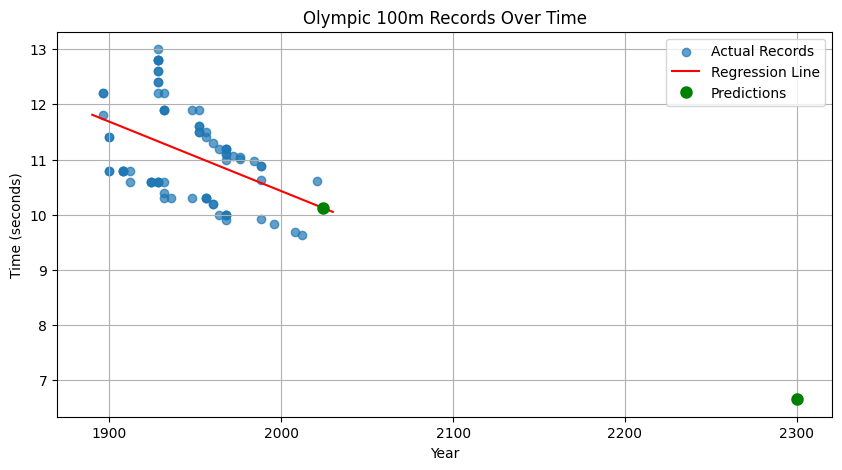

In [78]:
plt.figure(figsize=(10, 5))
plt.scatter(df['Year'], df['Time'], alpha=0.7, label='Actual Records')


years_plot = np.linspace(1890, 2030, 100).reshape(-1, 1)
predicted_times = model.predict(years_plot)
plt.plot(years_plot, predicted_times, 'r-', label='Regression Line')


plt.plot([2024, 2300], predictions, 'go', markersize=8, label='Predictions')

plt.xlabel('Year'); plt.ylabel('Time (seconds)')
plt.title('Olympic 100m Records Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [79]:
print("VALIDITY ANALYSIS:")
print(" 2024 prediction: Reasonable - follows current trend")
print(" 2300 prediction: UNREALISTIC - beyond human performance")
print("\nISSUES:")
print("- Linear model assumes infinite improvement")
print("- Human performance has biological limits (~9 seconds)")


VALIDITY ANALYSIS:
 2024 prediction: Reasonable - follows current trend
 2300 prediction: UNREALISTIC - beyond human performance

ISSUES:
- Linear model assumes infinite improvement
- Human performance has biological limits (~9 seconds)
